<a href="https://colab.research.google.com/github/pvn-leo/DataAnalytics/blob/master/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [2]:
cd

/root


In [3]:
cd /content/drive/My Drive/da5

/content/drive/My Drive/da5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

In [2]:
#df=pd.read_csv('./US_accidents1.csv')
df=pd.read_csv('./US_accidents2.csv')

In [3]:
print("Rows : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows :  3048164
Columns :  32


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

In [9]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [10]:
missing_values_table(df)

The dataframe has 32 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
'''
df.side.value_counts()
li = list(df['side'].value_counts())
print(len(li))
print(len(df.columns))
minimal_categorical=['side','bump','crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming','traffic_signal','sunrise_sunset','year','month','day','hour','weekday']
one_hot_col = []
for i in range(32):
  ok = df.columns[i]
  li = list(df[ok].value_counts())
  if(len(li) >=2 and len(li)<=3):
    one_hot_col.append(ok)

print(one_hot_col)
#['source', 'side', 'amenity', 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset']
'''

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [5]:
da = df.copy()

# Imputations

In [37]:
#weather_condition has null values, hence best method to fill the missing values would be to fill in the mode since, they are categorical values
print(da['weather_condition'].isnull().values.any())
weather_cond_mode = (da['weather_condition'].mode())
print(weather_cond_mode[0])
da["weather_condition"].fillna(weather_cond_mode[0], inplace=True)
print(da['weather_condition'].isnull().sum())
da['weather_condition'].isnull().values.any()

True
Clear
0


False

In [38]:
#wind_direction has null values, hence best method to fill the missing values would be to fill in the mode since, they are categorical values
print(da['wind_direction'].isnull().values.any())
wind_cond_mode = (da['wind_direction'].mode())
print(wind_cond_mode[0])
da["wind_direction"].fillna(wind_cond_mode[0], inplace=True)
print(da['wind_direction'].isnull().sum())
da['wind_direction'].isnull().values.any()

True
Calm
0


False

In [39]:
print(da['temperature(f)'].isnull().values.any())
print(da['humidity(%)'].isnull().values.any())
print(da['pressure(in)'].isnull().values.any())
print(da['visibility(mi)'].isnull().values.any())
print(da['wind_speed(mph)'].isnull().values.any())

True
True
True
True
True


In [40]:
da['temperature(f)'] = da['temperature(f)'].fillna((da['temperature(f)'].mean()))
da['pressure(in)'] = da['pressure(in)'].fillna((da['pressure(in)'].mean()))
da['humidity(%)'] = da['humidity(%)'].fillna((da['humidity(%)'].mean()))
da['visibility(mi)'] = da['visibility(mi)'].fillna((da['visibility(mi)'].median()))
da['wind_speed(mph)'] = da['wind_speed(mph)'].fillna((da['wind_speed(mph)'].median()))

In [41]:
print(da['temperature(f)'].isnull().values.any())
print(da['humidity(%)'].isnull().values.any())
print(da['pressure(in)'].isnull().values.any())
print(da['visibility(mi)'].isnull().values.any())
print(da['wind_speed(mph)'].isnull().values.any())

False
False
False
False
False


# Scaling/Encoding

In [6]:
numerical_cols = ['temperature(f)','humidity(%)','pressure(in)','visibility(mi)','wind_speed(mph)']
#normal distribution - mean is 0 and variance is 1, standard scaling
#scaling
for i in numerical_cols:
    scale = StandardScaler().fit(da[[i]])
    #inplace transformation
    da[i] = scale.transform(da[[i]])

In [43]:
#using pd_getdummies(one hot encoding)
# all of these columns are like binary values true/false, or have atmost 3 unique values
onehotencode = ['side', 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset']
for i in onehotencode:
    da = pd.concat([da,pd.get_dummies(da[i], prefix=i)],axis=1)
    da.drop([i],axis=1, inplace=True)

In [44]:
#label encoding
#many unique values for each attribute, hence label encoding
label_encode=['source','city','weather_condition', 'wind_direction']
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for i in label_encode:
    da[i] = labelencoder.fit_transform(da[i])
    print(i+" done")

source done
city done
weather_condition done
wind_direction done


In [9]:
da.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

# Analysis of Relevant Columns

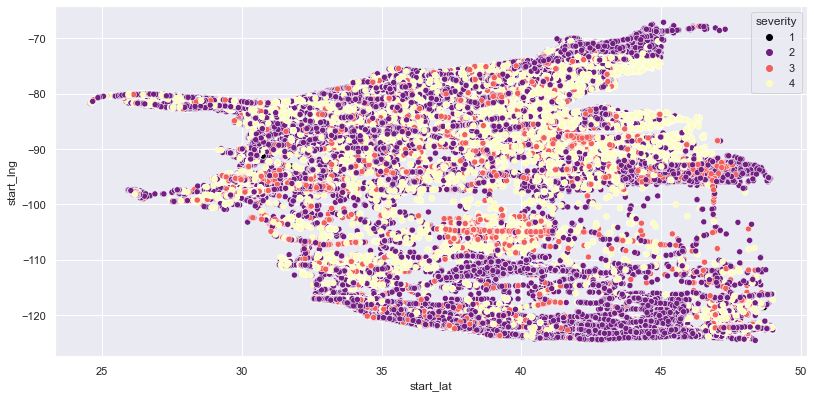

In [18]:
sns.scatterplot(data=df,x="start_lat",y="start_lng",hue="severity",palette="magma")

In [7]:
print(f'Unique City Names = {df.city.nunique()}\n\
Unique Weather Conditions = {df.weather_condition.nunique()}\n\
Unqiue Wind Directions = {df.wind_direction.nunique()}')

Unique City Names = 11513
Unique Weather Conditions = 125
Unqiue Wind Directions = 18


In [8]:
da[['side']] = da[['side']].astype(int) 

<hr>
<h1>Models</h1>

#### LogReg

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,accuracy_score

cv_split = StratifiedKFold(n_splits = 10)

In [15]:
target='severity'
unwanted_col=['Unnamed: 0','id', 'start_time','end_time','description','state','start_lat','start_lng','city','source']

X = da.drop(unwanted_col, axis=1)
y = da[target]
class_names = list(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [10]:
logistic_regression = LogisticRegression(random_state=0, verbose=10,max_iter=100,n_jobs=-1)
%time logistic_regression.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Wall time: 2min 22s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=10, warm_start=False)

In [11]:
y_pred_logreg = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred_logreg, labels = da.severity.unique().tolist()))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97    414357
           3       0.88      0.93      0.90    170567
           1       0.05      0.01      0.02      5693
           4       0.11      0.06      0.07     19016

    accuracy                           0.92    609633
   macro avg       0.50      0.49      0.49    609633
weighted avg       0.91      0.92      0.91    609633



In [12]:
acc = accuracy_score(y_test,y_pred_logreg)
f1 = f1_score(y_test,y_pred_logreg,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

Accuracy: 0.9229470845574305
F1-score: 0.913675629458952


Logistic Regression Confusion Matrix
[[    75   5618      0      0]
 [  1531 403576   3770   5480]
 [    60   9122 157946   3439]
 [     0      3  17951   1062]]


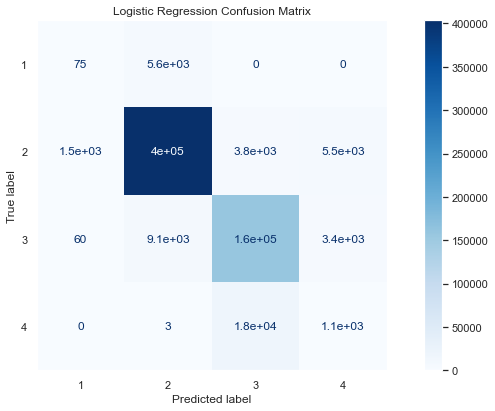

In [13]:
title = 'Logistic Regression Confusion Matrix'
disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.grid(b=None)
plt.show()

In [14]:
cv_results = cross_validate(logistic_regression, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.4min remaining: 17.8min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  4.5min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  4.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.7min finished


In [15]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

Average Fit Time: 265.82715384960176 seconds
Average Train Accuracy: 93.60084012568949 %
Average Test Accuracy: 93.40740847367096 %
Average Train F1_Score: 92.60020317288892 %
Average Test F1_Score: 92.46963180247218 %


---

#### RFC

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(max_depth=2, random_state=0,verbose=1,n_jobs=-1)
%time rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s


Wall time: 38.8 s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [18]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc, labels = da.severity.unique().tolist()))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97    414357
           3       0.88      0.93      0.90    170567
           1       0.05      0.01      0.02      5693
           4       0.11      0.06      0.07     19016

    accuracy                           0.92    609633
   macro avg       0.50      0.49      0.49    609633
weighted avg       0.91      0.92      0.91    609633



In [19]:
acc = accuracy_score(y_test,y_pred_rfc)
f1 = f1_score(y_test,y_pred_rfc,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

Accuracy: 0.9229470845574305
F1-score: 0.913675629458952


Random Forest Classifier Confusion Matrix
[[    75   5618      0      0]
 [  1531 403576   3770   5480]
 [    60   9122 157946   3439]
 [     0      3  17951   1062]]


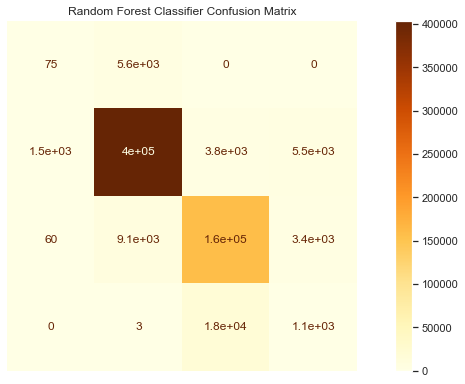

In [20]:
title = 'Random Forest Classifier Confusion Matrix'
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap='YlOrBr')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.axis('off')
plt.show()

In [21]:
cv_results = cross_validate(rfc, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.3min remaining: 17.3min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  4.4min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  4.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.5min finished


In [22]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

Average Fit Time: 249.38437304496765 seconds
Average Train Accuracy: 93.60084012568949 %
Average Test Accuracy: 93.40740847367096 %
Average Train F1_Score: 92.60020317288892 %
Average Test F1_Score: 92.46963180247218 %


---

#### KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 6,n_jobs=-1)
%time knn.fit(X_train,y_train)

Wall time: 26min 35s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, labels = da.severity.unique().tolist()))

In [ ]:
acc = accuracy_score(y_test,y_pred_knn)
f1 = f1_score(y_test,y_pred_knn,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

In [ ]:
title = 'Random Forest Classifier Confusion Matrix'
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap='YlOrBr')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.axis('off')
plt.show()

In [ ]:
cv_results = cross_validate(knn, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

In [ ]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

---

### Hyperparameter Optimization

In [ ]:
from sklearn import tree, linear_model, neighbors, ensemble, gaussian_process,model_selection
from xgboost import XGBClassifier

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM (general linear model)
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #xgboost
    XGBClassifier()    
    ]


voters = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('lr', linear_model.LogisticRegressionCV()),
    ('sgd', linear_model.SGDClassifier()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('xgb', XGBClassifier())
]

In [ ]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = voters , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv  = cv_split,return_train_score=True,scoring=('accuracy', 'f1_weighted'))
vote_hard.fit(X, y)

print(f"Hard Voting Training Accuracy mean: {vote_hard_cv['train_accuracy'].mean()*100} %") 
print(f"Hard Voting Test Accuracy mean: {vote_hard_cv['test_accuracy'].mean()*100} %")
print(f"Hard Voting Train F1_Score: {vote_hard_cv['train_f1_weighted'].mean()*100} %")
print(f"Hard Voting Test F1_Score: {vote_hard_cv['test_f1_weighted'].mean()*100} %")

In [ ]:
grid_seed = [0]
grid_bool = [True, False]
grid_criterion = ['gini', 'entropy']
grid_n_estimator = range(50,350,50)
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]

grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default = 0.1
            'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
    


            [{
            #GradientBoostingClassifier 
            'learning_rate': grid_learn, #default=0.1 
            'n_estimators': grid_n_estimator, #default=100 
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default='gini'
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True],
            'random_state': grid_seed
             }],
    
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            'penalty': ['l1','l2','elasticnet'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
                
    
            #SGDClassifier - 
            [{}],
    
    
            [{
            #KNeighborsClassifier 
            'n_neighbors': range(3,15,2), #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            

            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]


In [ ]:
start_total = time.perf_counter() 
for clf, param in zip (voters, grid_param): 
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'accuracy')
    best_search.fit(X, y)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 
    print('-'*10)

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

In [ ]:
grid_hard = ensemble.VotingClassifier(estimators = voters , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split,return_train_score=True,scoring=('accuracy', 'f1_weighted'))
grid_hard.fit(X, y)

print(f"Hard Voting Training Accuracy mean: {vote_hard_cv['train_accuracy'].mean()*100} %") 
print(f"Hard Voting Test Accuracy mean: {vote_hard_cv['test_accuracy'].mean()*100} %")
print(f"Hard Voting Train F1_Score: {vote_hard_cv['train_f1_weighted'].mean()*100} %")
print(f"Hard Voting Test F1_Score: {vote_hard_cv['test_f1_weighted'].mean()*100} %")